### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [68]:
lista_tiendas = ['tienda','tienda2','tienda3','tienda4']
tienda.keys()

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [82]:
total_precio_tienda1 = tienda['Precio'].sum()
total_precio_tienda2 = tienda2['Precio'].sum()
total_precio_tienda3 = tienda3['Precio'].sum()
total_precio_tienda4 = tienda4['Precio'].sum()

lista_ventas = [total_precio_tienda1,total_precio_tienda2,total_precio_tienda3,total_precio_tienda4]

print(f"Total de precios en tienda 1: {total_precio_tienda1}")
print(f"Total de precios en tienda 2: {total_precio_tienda2}")
print(f"Total de precios en tienda 3: {total_precio_tienda3}")
print(f"Total de precios en tienda 4: {total_precio_tienda4}")
print(lista_ventas)

Total de precios en tienda 1: 1150880400.0
Total de precios en tienda 2: 1116343500.0
Total de precios en tienda 3: 1098019600.0
Total de precios en tienda 4: 1038375700.0
[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


# 2. Ventas por categoría

In [32]:
cantidad_por_categoria = tienda['Categoría del Producto'].value_counts()+tienda2['Categoría del Producto'].value_counts()+tienda3['Categoría del Producto'].value_counts()+tienda4['Categoría del Producto'].value_counts()

cantidad_por_categoria

,count
Categoría del Producto,
Artículos para el hogar,730
Deportes y diversión,1113
Electrodomésticos,1149
Electrónicos,1772
Instrumentos musicales,753
Juguetes,1290
Libros,742
Muebles,1886


# 3. Calificación promedio de la tienda


In [28]:
def prom(lista):
  suma = 0
  for i in lista:
    suma += i
  return suma/len(lista)

In [70]:
calificacion_promedio_tienda1 = prom(tienda['Calificación'])
calificacion_promedio_tienda2 = prom(tienda2['Calificación'])
calificacion_promedio_tienda3 = prom(tienda3['Calificación'])
calificacion_promedio_tienda4 = prom(tienda4['Calificación'])

lista_calificaciones = [calificacion_promedio_tienda1,calificacion_promedio_tienda2,calificacion_promedio_tienda3,calificacion_promedio_tienda4]

print(f"La calificacion promedio en tienda 1: {calificacion_promedio_tienda1}")
print(f"La calificacion promedio en tienda 2: {calificacion_promedio_tienda2}")
print(f"La calificacion promedio en tienda 3: {calificacion_promedio_tienda3}")
print(f"La calificacion promedio en tienda 4: {calificacion_promedio_tienda4}")

La calificacion promedio en tienda 1: 3.976685036032217
La calificacion promedio en tienda 2: 4.037303942348453
La calificacion promedio en tienda 3: 4.048325561678677
La calificacion promedio en tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [39]:
for Categoría,Cantidad in tienda['Categoría del Producto'].value_counts().items():
  print(f"Categoría: {Categoría} Cantidad: {Cantidad}")
#min(tienda['Categoría del Producto'].value_counts())

Categoría: Muebles Cantidad: 465
Categoría: Electrónicos Cantidad: 448
Categoría: Juguetes Cantidad: 324
Categoría: Electrodomésticos Cantidad: 312
Categoría: Deportes y diversión Cantidad: 284
Categoría: Instrumentos musicales Cantidad: 182
Categoría: Libros Cantidad: 173
Categoría: Artículos para el hogar Cantidad: 171


In [41]:
Producto_mas_vendido = tienda['Producto'].value_counts().idxmax()
Producto_menos_vendido = tienda['Producto'].value_counts().idxmin()

print(f"Producto mas vendido: {Producto_mas_vendido}")
print(f"Producto menos vendido: {Producto_menos_vendido}")

Producto mas vendido: Microondas
Producto menos vendido: Auriculares con micrófono


In [72]:
Producto_mas_vendido1 = tienda['Producto'].value_counts().idxmax()
Producto_menos_vendido1 = tienda['Producto'].value_counts().idxmin()
Producto_mas_vendido2 = tienda2['Producto'].value_counts().idxmax()
Producto_menos_vendido2 = tienda2['Producto'].value_counts().idxmin()
Producto_mas_vendido3 = tienda3['Producto'].value_counts().idxmax()
Producto_menos_vendido3 = tienda3['Producto'].value_counts().idxmin()
Producto_mas_vendido4 = tienda4['Producto'].value_counts().idxmax()
Producto_menos_vendido4 = tienda4['Producto'].value_counts().idxmin()
Producto_mas_vendido_general = (tienda['Producto'].value_counts()+tienda2['Producto'].value_counts()+tienda3['Producto'].value_counts()+tienda4['Producto'].value_counts()).idxmax()
Producto_menos_vendido_general = (tienda['Producto'].value_counts()+tienda2['Producto'].value_counts()+tienda3['Producto'].value_counts()+tienda4['Producto'].value_counts()).idxmin()

lista_mas_vendidos = [Producto_mas_vendido1,Producto_mas_vendido2,Producto_mas_vendido3,Producto_mas_vendido4,Producto_mas_vendido_general]
lista_menos_vendidos = [Producto_menos_vendido1,Producto_menos_vendido2,Producto_menos_vendido3,Producto_menos_vendido4,Producto_menos_vendido_general]

print(f"Producto mas vendido tienda 1: {Producto_mas_vendido1}")
print(f"Producto menos vendido tienda 1: {Producto_menos_vendido1}")
print(f"Producto mas vendido tienda 2: {Producto_mas_vendido2}")
print(f"Producto menos vendido tienda 2: {Producto_menos_vendido2}")
print(f"Producto mas vendido tienda 3: {Producto_mas_vendido3}")
print(f"Producto menos vendido tienda 3: {Producto_menos_vendido3}")
print(f"Producto mas vendido tienda 4: {Producto_mas_vendido4}")
print(f"Producto menos vendido tienda 4: {Producto_menos_vendido4}")
print(f"Producto mas vendido general: {Producto_mas_vendido_general}")
print(f"Producto menos vendido general: {Producto_menos_vendido_general}")

Producto mas vendido tienda 1: Microondas
Producto menos vendido tienda 1: Auriculares con micrófono
Producto mas vendido tienda 2: Iniciando en programación
Producto menos vendido tienda 2: Juego de mesa
Producto mas vendido tienda 3: Kit de bancas
Producto menos vendido tienda 3: Bloques de construcción
Producto mas vendido tienda 4: Cama box
Producto menos vendido tienda 4: Guitarra eléctrica
Producto mas vendido general: Mesa de noche
Producto menos vendido general: Celular ABXY


# 5. Envío promedio por tienda

In [56]:
envio_promedio = round(prom(tienda['Costo de envío']),2)
envio_promedio2 = round(prom(tienda2['Costo de envío']),2)
envio_promedio3 = round(prom(tienda3['Costo de envío']),2)
envio_promedio4 = round(prom(tienda4['Costo de envío']),2)

lista_envios = [envio_promedio,envio_promedio2,envio_promedio3,envio_promedio4]

print(f"El envio promedio de la tienda 1 es: {envio_promedio}")
print(f"El envio promedio de la tienda 2 es: {envio_promedio2}")
print(f"El envio promedio de la tienda 3 es: {envio_promedio3}")
print(f"El envio promedio de la tienda 4 es: {envio_promedio4}")

El envio promedio de la tienda 1 es: 26018.61
El envio promedio de la tienda 2 es: 25216.24
El envio promedio de la tienda 3 es: 24805.68
El envio promedio de la tienda 4 es: 23459.46


In [65]:
lista_envios

[26018.61, 25216.24, 24805.68, 23459.46]

#6. Graficos

In [54]:
import matplotlib.pyplot as plt

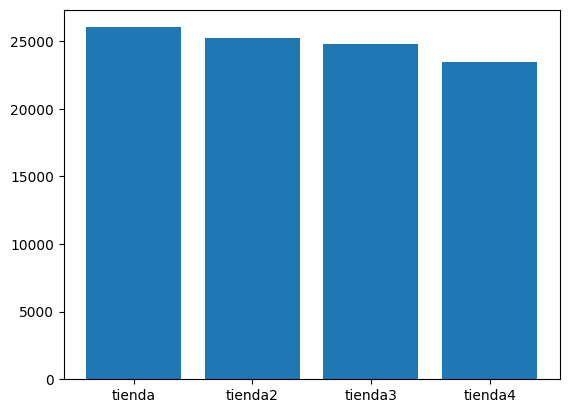

In [76]:
plt.bar(x=lista_tiendas, height=lista_envios)
#plt.bar(tienda['Producto'], tienda['Precio'])

plt.show()

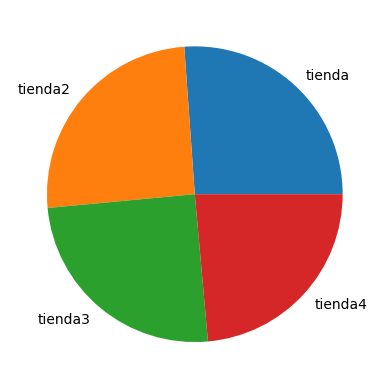

In [84]:
plt.pie(x=lista_ventas, labels=lista_tiendas)
plt.show()

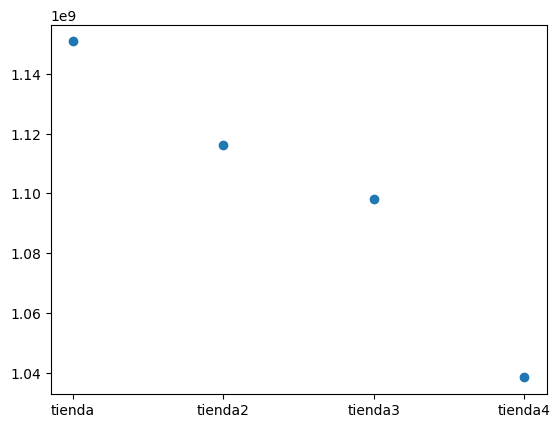

In [81]:
plt.scatter(x=lista_tiendas, y=)
plt.show()

# 7. Ánalisis Final.

## Ingresos totales por tienda.

Total de ingresos en tienda 1: 1,150,880,400.0

Total de ingresos en tienda 2: 1,116,343,500.0

Total de ingresos en tienda 3: 1,098,019,600.0

Total de ingreso en tienda 4: 1,038,375,700.0

La tienda con los menores ingresos fue la tienda 4.

## Categoría de productos más y menos vendidas.

La categoría más vendida fue: Muebles

La categoría menos vendida fue: Articulos para el hogar

## Calificación promedio por tienda.

La calificacion promedio en tienda 1: 3.97

La calificacion promedio en tienda 2: 4.03

La calificacion promedio en tienda 3: 4.04

La calificacion promedio en tienda 4: 3.99

La tienda con la calificación promedio más baja, fue la tienda #4.

## Productos más y menos vendidos.

Producto mas vendido tienda 1: Microondas

Producto mas vendido tienda 2: Iniciando en programación

Producto mas vendido tienda 3: Kit de bancas

Producto mas vendido tienda 4: Cama box

Producto mas vendido general: Mesa de noche

Producto menos vendido tienda 1: Auriculares con micrófono

Producto menos vendido tienda 2: Juego de mesa

Producto menos vendido tienda 3: Bloques de construcción

Producto menos vendido tienda 4: Guitarra eléctrica

Producto menos vendido general: Celular ABXY

## Coste de envío promedio.

El envio promedio de la tienda 1 es: 26018.61

El envio promedio de la tienda 2 es: 25216.24

El envio promedio de la tienda 3 es: 24805.68

El envio promedio de la tienda 4 es: 23459.46

## Veredicto final.

Luego del detenido analisis de los datos suministrados, la tienda que se recomienda cerrar es la #4, ya que es la tienda que genera menor cantidad de movimiento y tiene las segundas reseñas generales más bajas, si bien es cierto el costo de envío es el menor de todas, esto responde a temas de locaclizcaión de los clientes y de la propia tienda y no representa una razón de peso suficiente para ingnorar el resto de sus falencias.

Por lo que se recomienda su cierre y reinversión de capital entre las demás tiendas.